In [2]:
# impoting basic functional libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# warnings is used to ignore and to not to dsiplays warnings that arise during execution of code
import warnings 
warnings.filterwarnings('ignore')

# magic command - used to display matplotlib visualizations within jupyter notebook interface  
%matplotlib inline

# setting up visualization parameters
plt.rcParams['figure.figsize'] = ([5,5])
plt.rcParams['figure.dpi'] = 150

# importing linear regression model
from sklearn.linear_model import LinearRegression

#importing train_test_split
from sklearn.model_selection import train_test_split

#importing evaluation metrics for evaluating linear regression model
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# importing MinMaxScaler for normalization of data
from sklearn.preprocessing import MinMaxScaler

In [3]:
#reading dataframe
df = pd.read_csv("C:\\Users\\HP\\Desktop\\python\\udemy_py\\08-Linear-Regression-Models\\Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


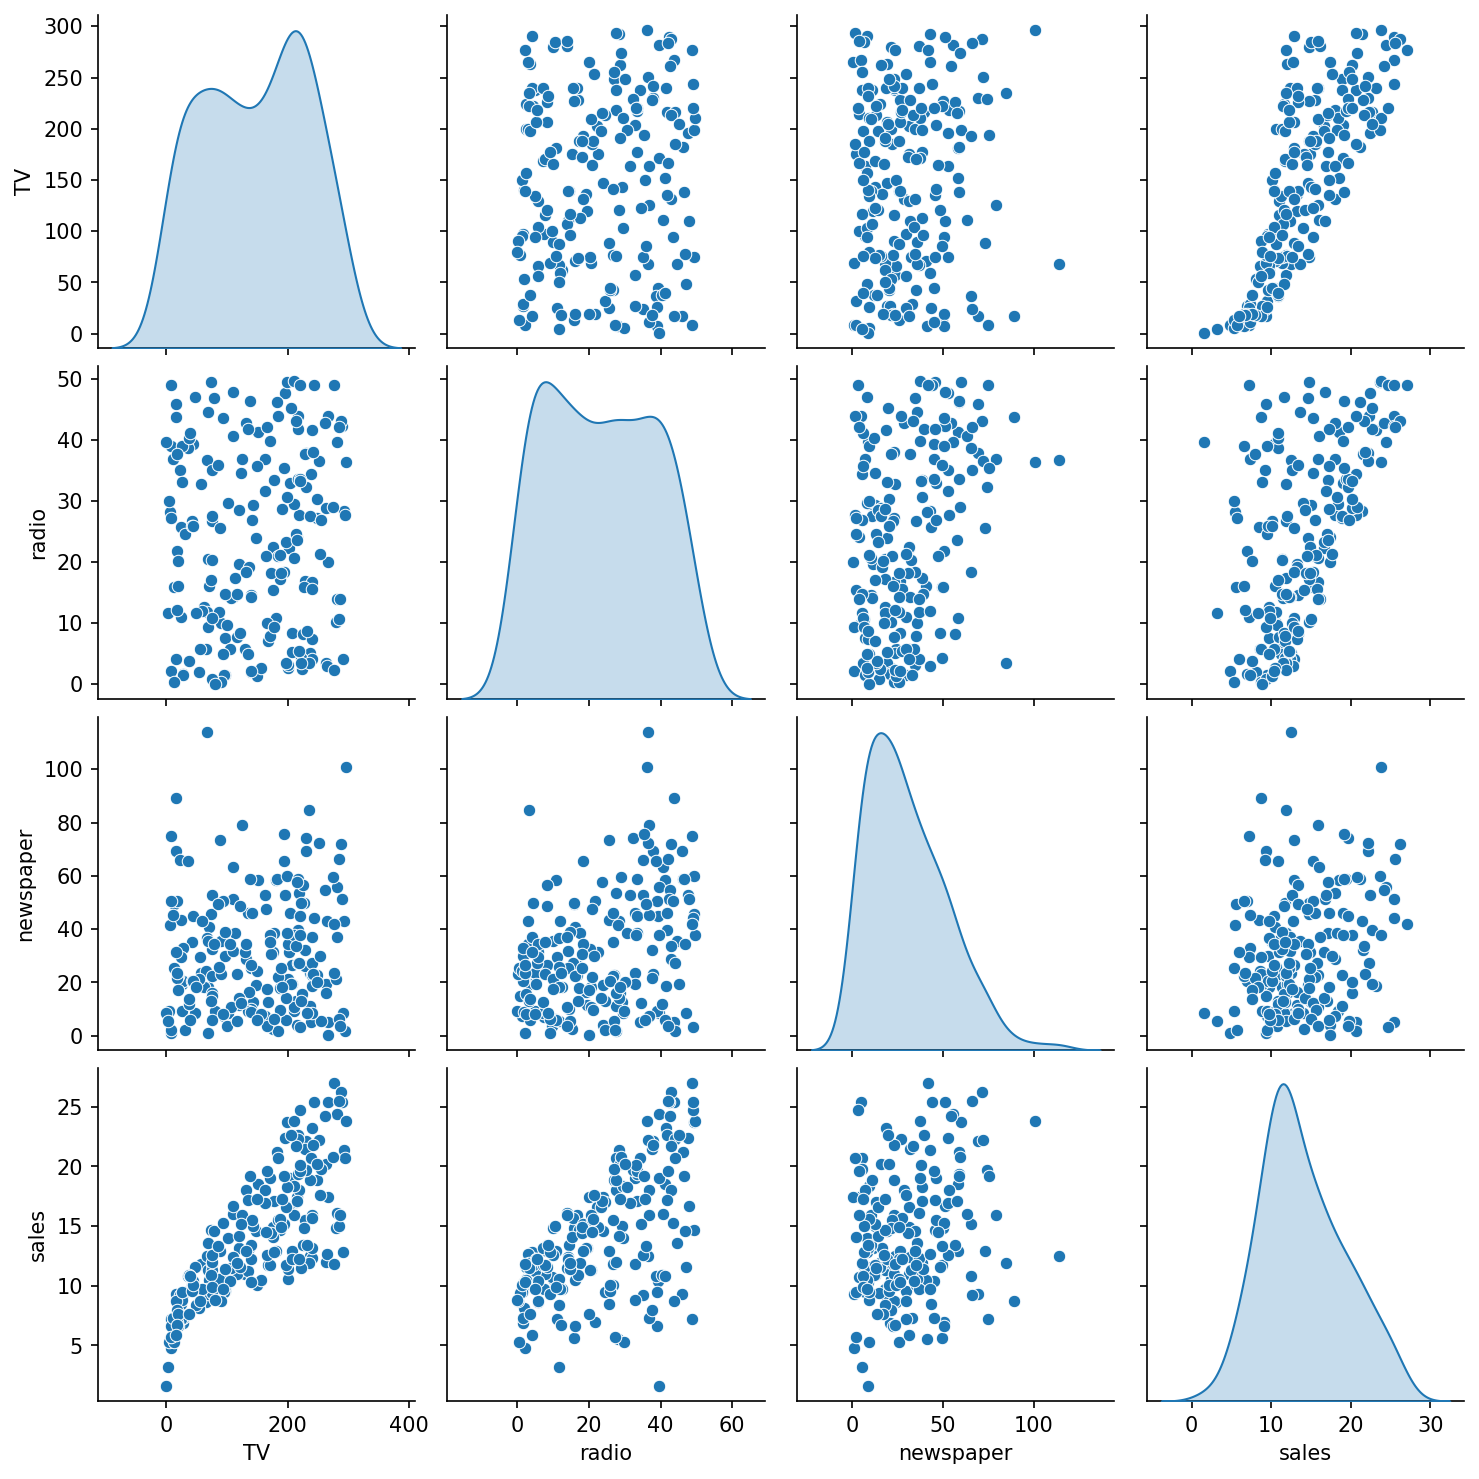

In [4]:
# pairplot to visualize relationship between all the variables in a dataset
# on diagonal it contains distribution of variable (diag_kind = 'kde' gives kde plot on diagonals, 
# otherwise histogram is default)

sns.pairplot(data = df, diag_kind = 'kde')

In [7]:
# splitting the data in features and target

x = df.drop('sales',axis = 1) #selecting all the columns except sales
y = df['sales']

In [8]:
# train test split of data with test size = 30% of total data
# random_state is seed value, which can be any arbitary number, IT SHOULD BE SAME IN CASE OF MODEL COMPARISON 
# TO GET SIMILAR SAMPLE OF DATA
# TRAIN TEST SPLIT SHUFFLES THE DATA BEFORE SPLITTING THERE FOR RANDOM_STATE HELPS TO GET SAME SET OF SHUFFILING TO ALL SPLITS

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=101)

In [15]:
len(x_train),len(x_test),len(y_train),len(y_test)

(140, 60, 140, 60)

In [18]:
y_train.head()

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
Name: sales, dtype: float64

In [21]:
y_test.head()

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
Name: sales, dtype: float64

In [19]:
x_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [20]:
x_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [16]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |  
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |  

In [9]:
# creating model instance for linear regression

model = LinearRegression()

In [10]:
# fitting the model on x_train & y_train data

model.fit(x_train,y_train)

LinearRegression()

In [31]:
# retriving model coefficient for all features 
model.coef_

array([ 0.04469599,  0.1875657 , -0.00032275])

In [12]:
# predicting values for X_test 
predictions = model.predict(x_test)

In [13]:
predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [14]:
# evaluating model on evaluation metrics

mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 

print ('Mean Absolute Error: ',mae)
print ('Mean Squared Error: ',mse)
print ('root Mean squared Error: ',mae)

Mean Absolute Error:  1.2137457736144808
Mean Squared Error:  2.298716697886378
root Mean squared Error:  1.2137457736144808


In [14]:
r2_score(y_test,predictions)

0.9185780903322446

In [22]:
residual = y_test - predictions
residual

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

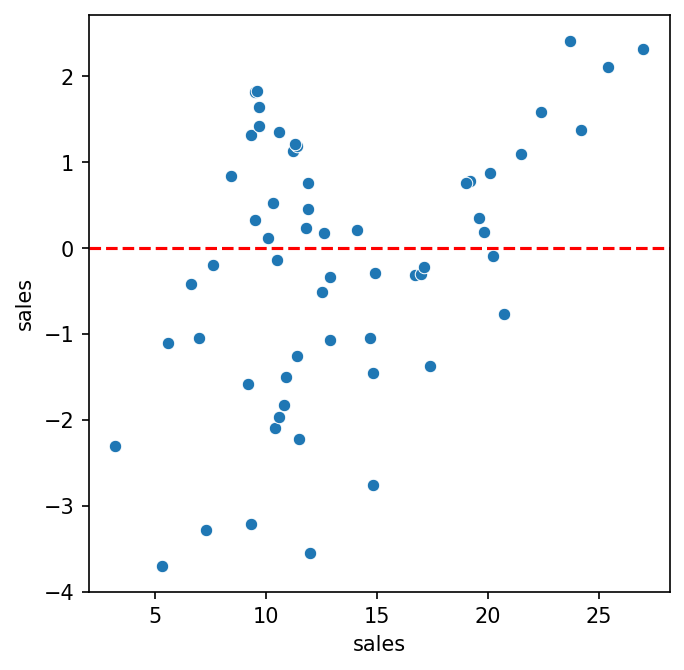

In [23]:
# It's also important to plot out residuals and check for normal distribution, 
# this helps us understand if Linear Regression was a valid model choice.
sns.scatterplot(y = residual, x = y_test)
plt.axhline(color = 'red',linestyle = '--')

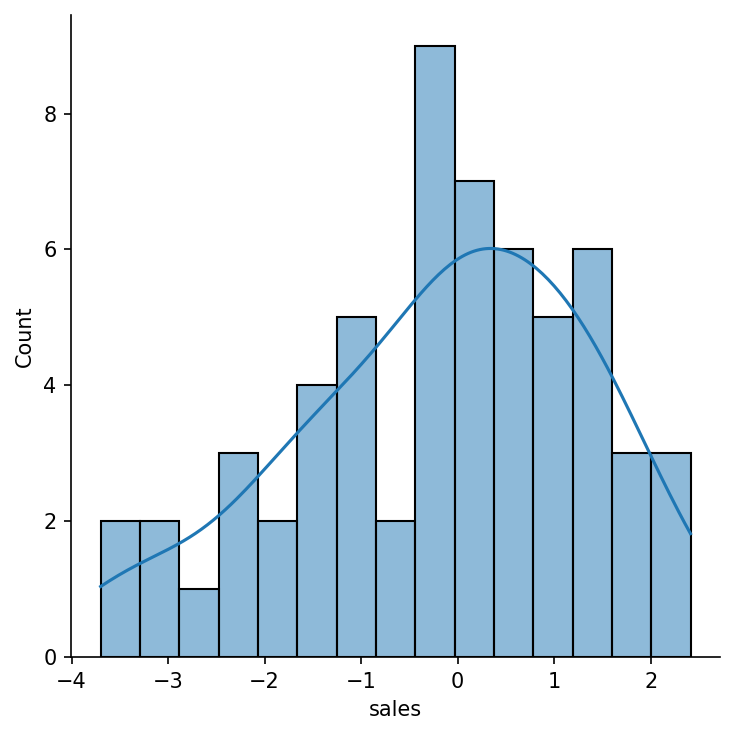

In [26]:
# visualizing distribution of residuals to confirm normality

sns.displot(residual,bins = 15,kde=True)

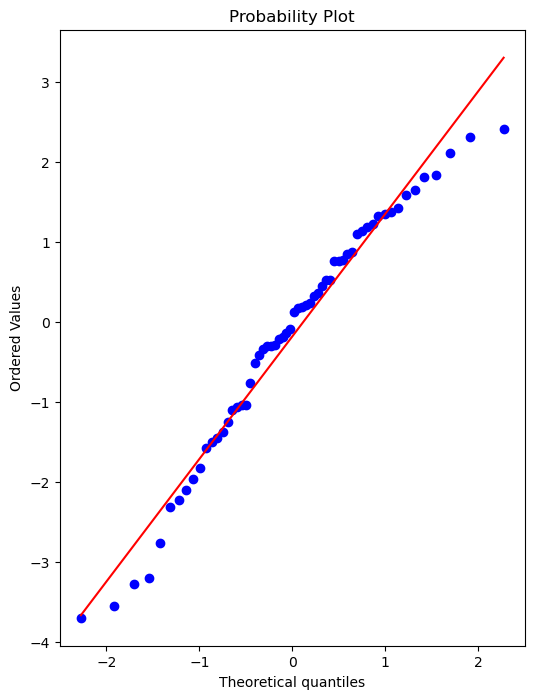

In [25]:
# probability plot
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
_ = stats.probplot(residual, plot = ax)

In [27]:
# fitting the model on complete data

In [28]:
final_model = LinearRegression()

In [29]:
final_model.fit(x,y)

LinearRegression()

In [30]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [32]:
# importing library to save & load the model for reusing 
from joblib import dump, load

In [33]:
# saving the model

dump(final_model, 'final_linear_red.joblib')

['final_linear_red.joblib']

In [34]:
# loading the model and assigning it to a variable 
load_model = load('final_linear_red.joblib')